<a href="https://colab.research.google.com/github/SUHANI-21/MachineLearningLab/blob/main/RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we trained a **Linear Regression model** using the ***California Housing Dataset*** and evaluated its performance using ***RMSE and R2 score.***


**R²** measures the proportion of the variance in the target (y) that is explained by the model.

**Root Mean Square or RMSE** calculates how far off our predictions are from the actual values.
It includes 3 steps **squaring, averaging and calculating** the root of the difference between y_act and y_pred.
The **difference** calculates the error.
For different values of y (data points) the error may be positive or negative. Just so the errors do not cancel out each other we **square** it.
To find out how far off (approximation exact would be the actual error) each prediction is, we divide the** sum of all differences by n**.
And then we **square root** it to bring it back to the same unit.





In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data  = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MedHouseVal'] = data.target
df.size
df.shape
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
X = df.drop('MedHouseVal', axis=1) # X had all the features, including the target feature, so we dropped it
y = df['MedHouseVal']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.7456
R²: 0.5758


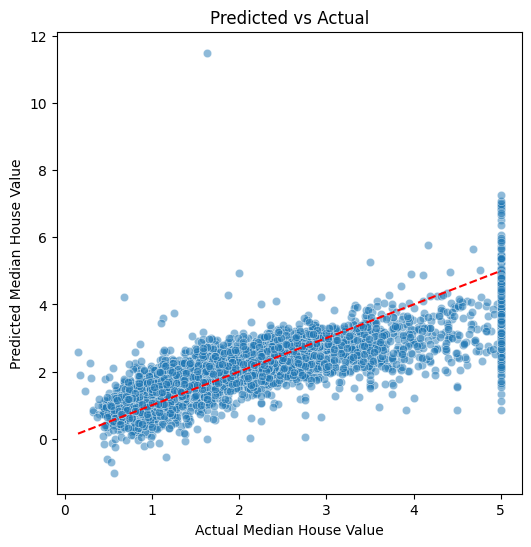

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

On average, the model’s predictions are off by about 0.7456 units
About 57.6% of the variance in median house values is explained by the model.